In [2]:
%autosave 60
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

import pickle

Autosaving every 60 seconds
Automatically created module for IPython interactive environment


DATA_DIR = "C:/Wasif/PD Motor Feature Extraction/TASK2_FEATURES_04_21/"
X_file = "x_repeat_removed_raw_pixels.npy"
y_file = "y_repeat_removed_raw_pixels.npy"
X_index_file = "index_repeat_removed.pickle"

In [3]:
FEATURE_TYPE = 'deepmag' #['raw', 'deepmag']

if FEATURE_TYPE == 'raw':
    DATA_DIR = "C:/Wasif/PD Motor Feature Extraction/TASK2_FEATURES_04_21/"
    X_file = "x_repeat_removed_raw_pixels.npy"
    y_file = "y_repeat_removed_raw_pixels.npy"
    X_index_file = "index_repeat_removed.pickle"

elif FEATURE_TYPE == 'deepmag':
    DATA_DIR = "E:/Wasif/PDMotorFeatureExtraction/Task2_features_deepMAG/"
    X_file = "x_repeat_removed_deepmag.npy"
    y_file = "y_repeat_removed_deepmag.npy"
    X_index_file = "index_repeat_removed.pickle"
    
IMG_HEIGHT = 492
IMG_WIDTH = 492

In [4]:
def load_dataset(DATA_DIR):
    X = np.load(DATA_DIR+X_file)
    #For now, only considering the frequency features
    X = X[:,(IMG_HEIGHT*IMG_WIDTH):]
    
    #Scale features
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    
    X_scaled = X
    
    y = np.load(DATA_DIR+y_file)
    
    with open(DATA_DIR+X_index_file, 'rb') as handle:
        X_index = pickle.load(handle)  
    
    return (X_scaled, y, X_index)

In [5]:
def SMOTE_oversample(X,y):
    oversample = SMOTE()
    X, y = oversample.fit_resample(X, y)
    return (X,y)

In [6]:
def dataset_property(X, y):
    positives = np.sum(y==1.0)
    negatives = np.sum(y==0.0)
    print(positives, negatives)
    return

Dataset Loaded
278 484
484 484
Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] END ............................................C=50000; total time=   5.1s
[CV] END ............................................C=50000; total time=   5.6s
[CV] END ............................................C=50000; total time=   4.9s
[CV] END ............................................C=50000; total time=   5.2s
[CV] END ............................................C=50000; total time=   5.3s
[CV] END ............................................C=50000; total time=   5.2s
[CV] END ............................................C=50000; total time=   4.7s
[CV] END ............................................C=50000; total time=   4.4s
[CV] END ............................................C=50000; total time=   4.9s
[CV] END ............................................C=50000; total time=   5.7s
[CV] END ............................................C=30000; total time=   4.0s
[CV] END ........

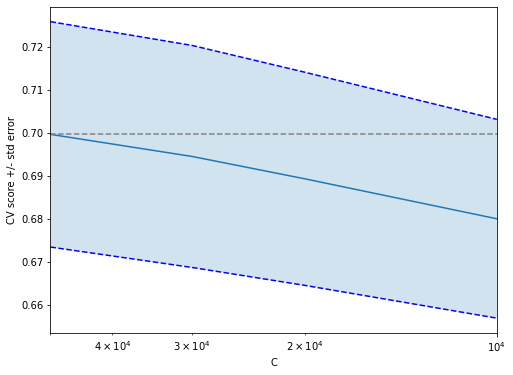

In [7]:
(X, y, X_index) = load_dataset(DATA_DIR)
assert(X.shape[0]==y.shape[0] and y.shape[0]==len(X_index))
print("Dataset Loaded")

#Subset of data for faster development
#X = X[:150]
#y = y[:150]

dataset_property(X,y)

(X,y) = SMOTE_oversample(X,y)
dataset_property(X,y)

#make_pipeline(StandardScaler(), SVC(gamma='auto'))
#model = Lasso(random_state=0, max_iter=100000)
model = sklearn.svm.SVC()
#alphas = np.logspace(-4, -0.5, 30)
#alphas = np.logspace(-4, -0.5, 10)
C = [50000, 30000, 20000, 10000]

tuned_parameters = [{'C': C}]
n_folds = 10

clf = GridSearchCV(model, tuned_parameters, cv=n_folds, refit=True, verbose=2, scoring='accuracy')
clf.fit(X, y)

print(clf.cv_results_)

scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(C, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(C, scores + std_error, 'b--')
plt.semilogx(C, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(C, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('C')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([C[0], C[-1]])
plt.show()

In [8]:
performance = {}
performance["TP"] = np.sum(y[clf.predict(X)==1]==1)
performance["TN"] = np.sum(y[clf.predict(X)==0]==0)
performance["FP"] = np.sum(y[clf.predict(X)==1]==0)
performance["FN"] = np.sum(y[clf.predict(X)==0]==1)

performance["precision"] = performance["TP"]/(performance["TP"]+performance["FP"])
performance['recall'] = performance["TP"]/(performance["TP"]+performance["FN"])
performance["f1"] = (2.0*performance["precision"]*performance["recall"])/(performance["precision"]+performance["recall"])

performance["accuracy"] = (performance["TP"]+performance["TN"])/(performance["TP"]+performance["TN"]+performance["FP"]+performance["FN"])

print(performance)

{'TP': 472, 'TN': 430, 'FP': 54, 'FN': 12, 'precision': 0.8973384030418251, 'recall': 0.9752066115702479, 'f1': 0.9346534653465346, 'accuracy': 0.9318181818181818}
